# Importing Libraries and Setup

Note: A continuation of making charts for the interim report

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing most recently updated and merged dataframe
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
# allowing all columns to be seen
pd.set_option('display.max_columns', None)

## Creating Charts - Continued

Note: Continuing to create and edit charts needed for interim report.

In [5]:
# checking values for upcoming prices chart
df_instacart['prices'].value_counts(dropna = False).sort_values()

21.0         8
18.3        11
21.5        85
22.7        99
20.2       123
         ...  
1.3     425691
6.3     438467
4.0     447272
10.3    510496
12.3    624261
Name: prices, Length: 241, dtype: int64

In [6]:
#checking for irregularities to make sure I am using the correct dataframe that does not have past pricing annomalies.
df_instacart['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

([<matplotlib.axis.YTick at 0x7fa4ad625ea0>,
 [Text(0, 0, '0'),
  Text(0, 500000, '0.5 mil'),
  Text(0, 1000000, '1 mil'),
  Text(0, 1500000, '1.5 mil'),
  Text(0, 2000000, '2 mil'),
  Text(0, 2500000, '2.5 mil'),
  Text(0, 3000000, '3 mil')])

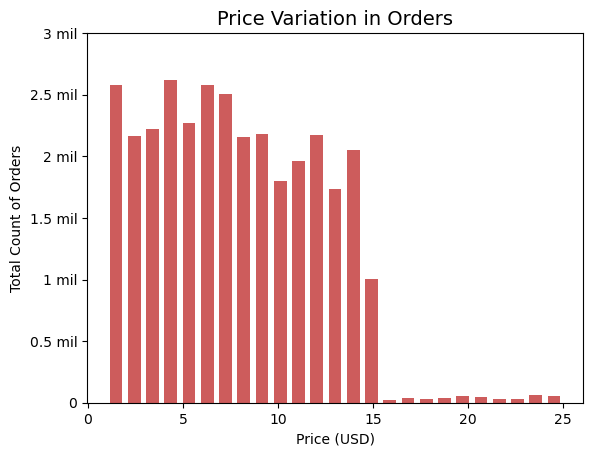

In [8]:
# creating histogram
hist = df_instacart['prices'].plot.hist(bins = 25, color = 'indianred', rwidth = 0.7)
plt.title('Price Variation in Orders', fontsize=14)
plt.xlabel('Price (USD)', fontsize=10)
plt.ylabel('Total Count of Orders', fontsize=10)
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000], ['0', '0.5 mil', '1 mil', '1.5 mil', '2 mil', '2.5 mil', '3 mil'])

Note: I have decided I need charts regarding loyalty customer types and will look into adding this to the customer profile.

In [9]:
# creating time flag for order-frequency times of the day, based on previous charts from 4.10 charts part 1
df_instacart.loc[(df_instacart['order_hour_of_day'] >= 0) & (df_instacart['order_hour_of_day'] < 6), 'time_flag'] = 'Morning Lull'
df_instacart.loc[(df_instacart['order_hour_of_day'] >= 6) & (df_instacart['order_hour_of_day'] < 9), 'time_flag'] = 'Morning Rise'
df_instacart.loc[(df_instacart['order_hour_of_day'] >= 9) & (df_instacart['order_hour_of_day'] < 17), 'time_flag'] = 'Peak'
df_instacart.loc[(df_instacart['order_hour_of_day'] >= 18) & (df_instacart['order_hour_of_day'] <= 23), 'time_flag'] = 'Evening Fall'

In [10]:
# checking work
df_instacart['time_flag'].value_counts()

Peak            21118071
Evening Fall     5703141
Morning Rise     2899665
Morning Lull      596328
Name: time_flag, dtype: int64

In [11]:
df_instacart.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,_merge,time_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak


In [12]:
# checking counts of loyalty_flag column
df_instacart['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [13]:
# create mini dataframe of each loyalty flag
df_new = df_instacart.loc[df_instacart['loyalty_flag'] == 'New customer']
df_regular = df_instacart.loc[df_instacart['loyalty_flag'] == 'Regular customer']
df_loyal = df_instacart.loc[df_instacart['loyalty_flag'] == 'Loyal customer']

([<matplotlib.axis.XTick at 0x7fa617cde290>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15'),
  Text(18, 0, '18'),
  Text(21, 0, '21')])

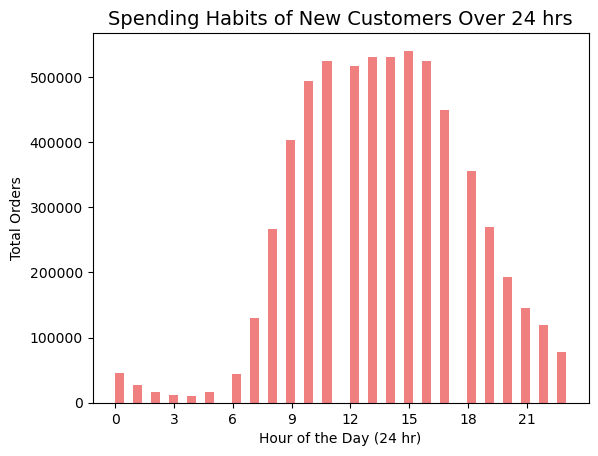

In [14]:
# creating a histogram of orders over 24 hours of new customers
hist_new = df_new['order_hour_of_day'].plot.hist(bins = 50, color = 'lightcoral')
plt.title('Spending Habits of New Customers Over 24 hrs', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Total Orders', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
#plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000], ['0', '0.5 mil', '1 mil', '1.5 mil', '2 mil', '2.5 mil', '3 mil'])

([<matplotlib.axis.YTick at 0x7fa55a079e40>,
 [Text(0, 0, '0.0'),
  Text(0, 200000, '0.2'),
  Text(0, 400000, '0.4'),
  Text(0, 600000, '0.6'),
  Text(0, 800000, '0.8'),
  Text(0, 1000000, '1.0'),
  Text(0, 1200000, '1.2'),
  Text(0, 1400000, '1.4'),
  Text(0, 1600000, '1.6')])

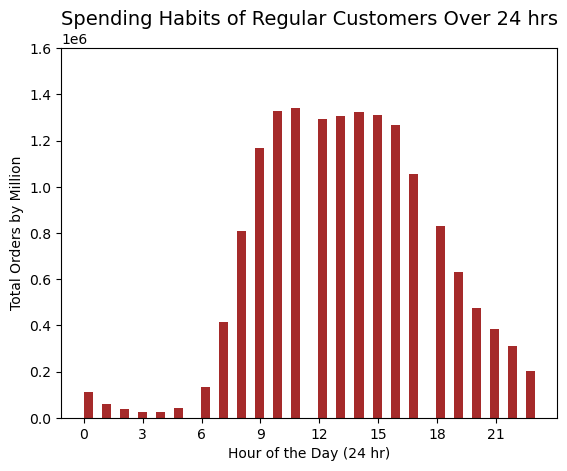

In [15]:
# creating a histogram of orders over 24 hours of regular customers
hist_regular = df_regular['order_hour_of_day'].plot.hist(bins = 50, color = 'brown')
plt.title('Spending Habits of Regular Customers Over 24 hrs', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Total Orders by Million', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000])

([<matplotlib.axis.XTick at 0x7fc5f89f7b20>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15'),
  Text(18, 0, '18'),
  Text(21, 0, '21')])

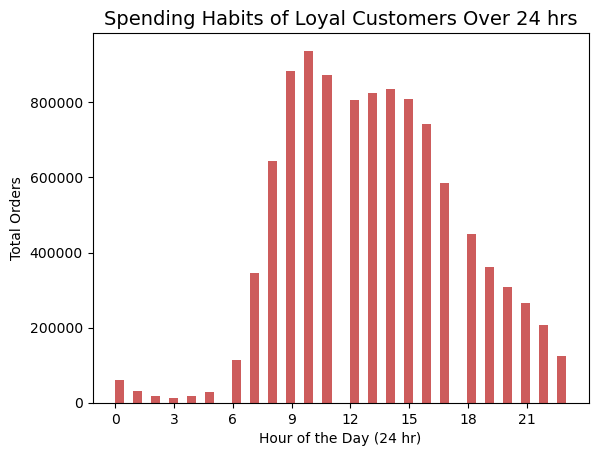

In [24]:
# creating a histogram of orders over 24 hours of loyal customers
hist_loyal = df_loyal['order_hour_of_day'].plot.hist(bins = 50, color = 'indianred')
plt.title('Spending Habits of Loyal Customers Over 24 hrs', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Total Orders', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])

In [27]:
# import dataframe with departments
df_dep = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [28]:
# renaming column
df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [30]:
# merging both dataframes
df_merged = df_instacart.merge(df_dep, on = 'department_id')

In [31]:
df_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,_merge,time_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Peak,beverages
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,prior,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,Peak,beverages
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,474720,prior,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,Evening Fall,beverages


In [33]:
# creating crosstab of loyalty_flag and departments
crosstab_loyalty_dep = pd.crosstab(df_merged['department'], df_merged['loyalty_flag'], dropna = False)

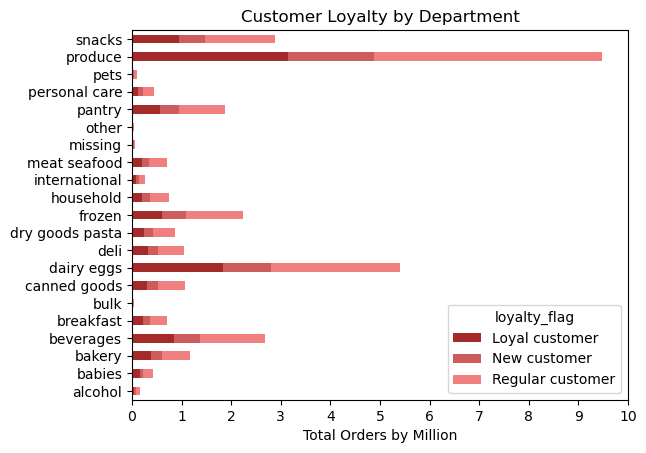

In [37]:
# creating stacked bar chart for crosstab
bar_dep_loyalty = crosstab_loyalty_dep.plot.barh(stacked = True, color = ['brown', 'indianred', 'lightcoral'])
plt.title('Customer Loyalty by Department')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Total Orders by Million')
plt.ylabel('')
plt.show()

In [39]:
# checking value counts for loyalty_flag
df_instacart['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

([<matplotlib.axis.XTick at 0x7fbd186b9e10>,
 [Text(0, 0, '0'),
  Text(2000000, 0, '2'),
  Text(4000000, 0, '4'),
  Text(6000000, 0, '6'),
  Text(8000000, 0, '8'),
  Text(10000000, 0, '10'),
  Text(12000000, 0, '12'),
  Text(14000000, 0, '14'),
  Text(16000000, 0, '16'),
  Text(18000000, 0, '18'),
  Text(20000000, 0, '20')])

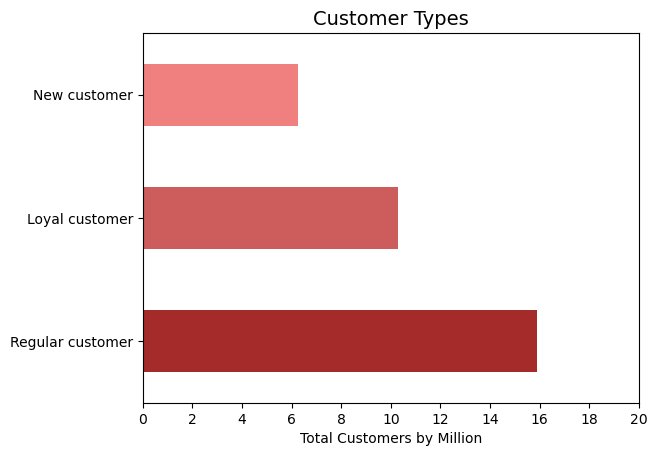

In [51]:
# recreating loyalty bar chart from earlier lesson to edit labels
loyalty_chart = df_instacart['loyalty_flag'].value_counts().plot.barh(color = ['brown', 'indianred', 'lightcoral'])
plt.title('Customer Types', fontsize=14)
plt.xlabel('Total Customers by Million')
plt.xticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000, 18000000, 20000000], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])